<a href="https://colab.research.google.com/github/srishticodes/Dataanalysis/blob/main/decisiontreeproblems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM 3 AIRLINE CLASSIFICATION

In [ ]:
import kagglehub
# Download the latest version of dataset
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
print("path to dataset", path)
import os
#list the files downloaded directly
files=os.listdir(path)
print("Files in dataset folder", files)
import pandas as pd
df = pd.read_csv(f"{path}/train.csv")
print("No of rows in dataset", df.shape[0])
print(df.shape[1])
print('Features',df.iloc[0,0:24])
print('Target',df.iloc[0,24])


path to dataset /kaggle/input/airline-passenger-satisfaction
Files in dataset folder ['train.csv', 'test.csv']
No of rows in dataset 103904
25
Features Unnamed: 0                                         0
id                                             70172
Gender                                          Male
Customer Type                         Loyal Customer
Age                                               13
Type of Travel                       Personal Travel
Class                                       Eco Plus
Flight Distance                                  460
Inflight wifi service                              3
Departure/Arrival time convenient                  4
Ease of Online booking                             3
Gate location                                      1
Food and drink                                     5
Online boarding                                    3
Seat comfort                                       5
Inflight entertainment                             5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score

df1 = df.drop(columns= ["id", "Flight Distance", "Gate location", "Gender", "Class", "Type of Travel", "Customer Type"])
df1 = df1.dropna()
X = df1.iloc[ : , : -1]
Y = df1 ['satisfaction']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
dfc = DecisionTreeClassifier()
dfc.fit(X_train, Y_train)
dfc_pred = dfc.predict(X_test)
print('Decision tree classifier')
print("Accuracy", accuracy_score(Y_test, dfc_pred))
print("Confusion matrix", confusion_matrix(Y_test, dfc_pred))
print("Precision", precision_score(Y_test, dfc_pred, average='micro'))

Decision tree classifier
Accuracy 0.9170809401998166
Confusion matrix [[10836   884]
 [  834  8165]]
Precision 0.9170809401998166


**precision** is also known as **positive predictive value**. It denotes how many *correct predictions out of all predictions*,
that is  
true positive/(true positive + false positive)

**recall** denotes how many positive records correctly predicted*.
given by
true positive/(true positive+false negative)

specifity = true negative/(true negative+false positive)

precision 0.9023096474748591
sensitivity 0.907323035892877


[Text(0.5, 0.8333333333333334, 'x[6] <= 3.5\nentropy = 0.987\nsamples = 103594\nvalue = [58697, 44897]'),
 Text(0.25, 0.5, 'x[2] <= 3.5\nentropy = 0.607\nsamples = 52271\nvalue = [44487, 7784]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.467\nsamples = 47553\nvalue = [42825, 4728]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.936\nsamples = 4718\nvalue = [1662.0, 3056.0]'),
 Text(0.75, 0.5, 'x[10] <= 3.5\nentropy = 0.851\nsamples = 51323\nvalue = [14210.0, 37113.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.999\nsamples = 20722\nvalue = [10031, 10691]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.575\nsamples = 30601\nvalue = [4179, 26422]')]

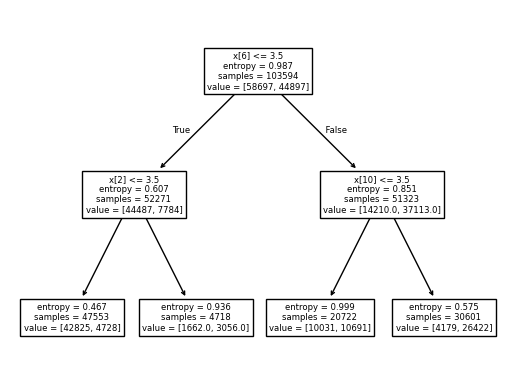

In [ ]:
print("precision", precision_score (Y_test, dfc_pred, pos_label='satisfied'))
print("sensitivity", recall_score (Y_test, dfc_pred, pos_label='satisfied'))
# Import the 'tree' submodule from sklearn
from sklearn import tree
c1f = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)
c1f.fit(X,Y)
tree.plot_tree(c1f) # Corrected to tree.plot_tree

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
df2 = df.copy()
df2 = df2.drop(columns=["id", "Flight Distance", "Gate location", "Gender", "Class", "Type of Travel", "Customer Type"])
df2 = df2.dropna()

# Define X and Y
X = df1.iloc[:, :-1]
Y = df1['satisfaction']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Now you can use X_train and Y_train in your GaussianNB model
c1f = GaussianNB()
c1f.fit(X_train, Y_train)

GaussianNB()